In [17]:
!unzip /content/dataset1.zip

Archive:  /content/dataset1.zip
replace dataset1/test/Banana/Banana 270.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [4]:
  trdata = ImageDataGenerator()
  traindata = trdata.flow_from_directory(directory="dataset1/train/",target_size=(299,299))
  tsdata = ImageDataGenerator()
  testdata = tsdata.flow_from_directory(directory="dataset1/test/", target_size=(299,299))

Found 4288 images belonging to 3 classes.
Found 588 images belonging to 3 classes.


In [0]:
from keras.models import Sequential , Model
from keras.layers import Dense , Activation
from keras.layers import Dropout , GlobalAveragePooling2D
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD , RMSprop , Adadelta , Adam
from keras.layers import Conv2D , BatchNormalization
from keras.layers import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [6]:
from keras.applications.inception_v3 import InceptionV3
# create the base pre-trained model
base_model = InceptionV3(weights=None, include_top=False , input_shape=(299, 299, 3))

In [7]:
x = base_model.output
x = Dropout(0.5)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
predictions = Dense(3, activation='sigmoid')(x)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
base_model.load_weights('/content/drive/My Drive/inception_v3_weights.h5')

In [0]:
model = Model(inputs=base_model.input, outputs=predictions)

In [10]:
model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])

In [19]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [12]:
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint , LearningRateScheduler
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1335: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [0]:
filepath="transferlearning_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [20]:
hist = model.fit_generator(generator=traindata, validation_data= testdata, validation_steps=10,epochs=10,callbacks=[lr_reduce,checkpoint],steps_per_epoch=10)

Epoch 1/10
10/10 [==============================] - 344s 34s/step - loss: 0.6291 - acc: 0.7594 - val_loss: 0.6530 - val_acc: 0.6875

Epoch 00001: val_acc improved from 0.59375 to 0.68750, saving model to transferlearning_weights.hdf5
Epoch 2/10
10/10 [==============================] - 348s 35s/step - loss: 0.5196 - acc: 0.8094 - val_loss: 0.5883 - val_acc: 0.7833

Epoch 00002: val_acc improved from 0.68750 to 0.78333, saving model to transferlearning_weights.hdf5
Epoch 3/10
10/10 [==============================] - 347s 35s/step - loss: 0.5444 - acc: 0.8000 - val_loss: 0.5536 - val_acc: 0.8000

Epoch 00003: val_acc improved from 0.78333 to 0.80000, saving model to transferlearning_weights.hdf5
Epoch 4/10
10/10 [==============================] - 348s 35s/step - loss: 0.5237 - acc: 0.7906 - val_loss: 0.5867 - val_acc: 0.7433

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 00004: val_acc did not improve from 0.80000
Epoch 5/10
10/10 [===============

In [21]:
print(hist.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


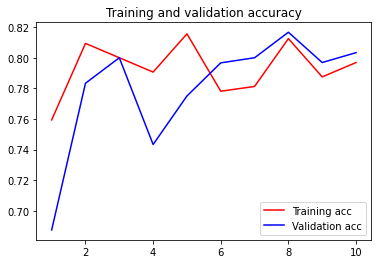

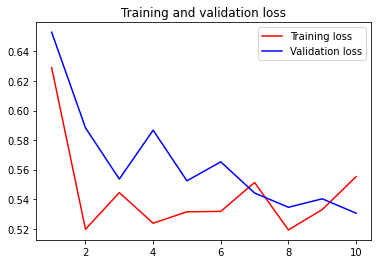

In [22]:
# plot the loss and accuracy
import matplotlib.pyplot as plt
%matplotlib inline

acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()